# ITMAL Exercise

REVISIONS||
---------||
2018-1219| CEF, initial.                  
2018-0206| CEF, updated and spell checked. 
2018-0208| CEF, minor text update.
2018-0305| CEF, updated with SHN comments.
2019-0902| CEF, updated for ITMAL v2.
2019-0904| CEF, updated and added conclusion Q.
2020-0125| CEF, F20 ITMAL update.
2020-0204| CEF, updated page numbers to HOMLv2.

## Implementing a dummy classifier with fit-predict interface

We begin with the MNIST data-set and will reuse the data loader from Scikit-learn. Next we create a dummy classifier, and compare the results of the SGD and dummy classifiers using the MNIST data...

#### Qb  Load and display the MNIST data

There is a `sklearn.datasets.fetch_openml` dataloader interface in Scikit-learn. You can load MNIST data like 

```python
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784',??) # needs to return X, y, replace '??' with suitable parameters! 
# Convert at scale (not always needed)
#X = X / 255.
```

but you need to set parameters like `return_X_y` and `cache` if the default values are not suitable! 

Check out the documentation for the `fetch_openml` MNIST loader, try it out by loading a (X,y) MNIST data set, and plot a single digit via the `MNIST_PlotDigit` function here (input data is a 28x28 NMIST subimage)

```python
%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
```

Finally, put the MNIST loader into a single function called `MNIST_GetDataSet()` so you can resuse it later.

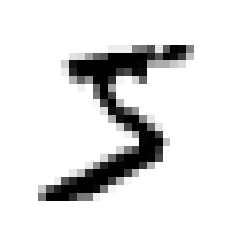

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def mnist_plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data("./datasets")
# Convert at scale (not always needed)

X_train = X_train / 255
X_test = X_test / 255

mnist_plot_digit(X_train[0])

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

Create a train-test data-set for MNIST and then add the `SGDClassifier` as done in [HOML], p.88.

Split your data and run the fit-predict for the classifier using the MNIST data.(We will be looking at cross-validation instead of the simple fit-predict in a later exercise.)

Notice that you have to reshape the MNIST X-data to be able to use the classifier. It may be a 3D array, consisting of 70000 (28 x 28) images, or just a 2D array consisting of 70000 elements of size 784.

A simple `reshape()` could fix this on-the-fly:
```python
X, y = MNIST_GetDataSet()

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)
```

Remember to use the category-5 y inputs

```python
y_train_5 = (y_train == '5')    
y_test_5  = (y_test == '5')
```
instead of the `y`'s you are getting out of the dataloader...

Test your model on using the test data, and try to plot numbers that have been categorized correctly. Then also find and plots some misclassified numbers.

In [6]:
print(f"X.shape={X_train.shape}")
def reshape_images_matrix(matrix):
    if matrix.ndim != 3:
        raise ValueError("Expected matrix with 3 dimensions but got: ", matrix.ndim)
    
    return matrix.reshape((matrix.shape[0],matrix.shape[1]*matrix.shape[2]))


if X_train.ndim != 2 and X_test.ndim != 2:
    X_train = reshape_images_matrix(X_train)
    X_test = reshape_images_matrix(X_test)
print("New X_train shape: ", X_train.shape)
print("New X_test shape: ", X_test.shape)

X.shape=(60000, 28, 28)
New X_train shape:  (60000, 784)
New X_test shape:  (10000, 784)


#### Qc Implement a dummy binary classifier

Now we will try to create a Scikit-learn compatible estimator implemented via a python class. Follow the code found in [HOML], p.90, but name you estimator `DummyClassifier` instead of `Never5Classifyer`.

Here our Python class knowledge comes into play. The estimator class hierarchy looks like

<img src="https://itundervisning.ase.au.dk/F20_itmal/L02/Figs/class_base_estimator.png" style="width:500px">

All Scikit-learn classifiers inherit from `BaseEstimator` (and possibly also `ClassifierMixin`), and they must have a `fit-predict` function pair (strangely not in the base class!) and you can actually find the `sklearn.base.BaseEstimator` and `sklearn.base.ClassifierMixin` python source code somewhere in you anaconda install dir, if you should have the nerves to go to such interesting details.

But surprisingly you may just want to implement a class that contains the `fit-predict` functions, ___without inheriting___ from the `BaseEstimator`, things still work due to the pythonic 'duck-typing': you just need to have the class implement the needed interfaces, obviously `fit()` and `predict()` but also the more obscure `get_params()` etc....then the class 'looks like' a `BaseEstimator`...and if it looks like an estimator, it _is_ an estimator (aka. duck typing).

Templates in C++ also allow the language to use compile-time duck typing!

> https://en.wikipedia.org/wiki/Duck_typing

Call the fit-predict on a newly instantiated `DummyClassifier` object, and find a way to extract the accuracy `score` from the test data. You may implement an accuracy function yourself or just use the `sklearn.metrics.accuracy_score` function. 

Finally, compare the accuracy score from your `DummyClassifier` with the scores found in [HOML] "Measuring Accuracy Using Cross-Validation", p.89. Are they comparable? 

In [111]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
from numpy.random import choice 


class KMeansClassifier(BaseEstimator, ClassifierMixin):

    def init__(self):
        self.num_cluster_centroids = 10

    def fit(self, X, y):
        if X.shape[0] <= self.num_cluster_centroids:
            raise ValueError("Expected number of cluster centroids to be less than inputs: ", X.shape)

        self.X = X
        self.y = y

        self.cluster_centroids = X[choice(X.shape[0], self.num_cluster_centroids, replace=False), :]

        self.cluster_indices = self.calculate_nearest_centroids()

        self.means = calculate_centroid_means()
        
        return self

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

    def calculate_nearest_centroids(self):
        cluster_indices = np.zeros((len(self.X), 1))
        for i in range(len(self.X)):
            nearest_cluster_i = np.argmin(
                np.array([self.distance(cluster_centroid, self.X[i]) 
                    for cluster_centroid in self.cluster_centroids]))
            cluster_indices[i] = nearest_cluster_i
        
        return cluster_indices
        

    def calculate_centroid_means(self):
        means = np.zeros((self.num_cluster_centroids, self.X.shape[1]))
        for i in range(self.num_cluster_centroids):
            means[i] = np.mean([self.X[c_i,:] 
                for c_i in range(len(self.cluster_indices)) 
                if self.cluster_indices[c_i] == i])
        
        return means


    def distance(self, cluster_centroid, x):
        return np.linalg.norm(cluster_centroid-x)
 
dummy_classifier = KMeansClassifier()

dummy_classifier.fit(X_train, y_train)



# test_score = dummy_classifier.score(X_test, y_test)
# test_validation_score = cross_val_score(dummy_classifier, X_train, y_train, cv=3, scoring="accuracy")

# print(test_score)
# print(test_validation_score)

AttributeError: 'KMeansClassifier' object has no attribute 'num_cluster_centroids'

### Qd Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

## Conclusion
In this exercise we first off imported and cleaned up data using the MNIST dataset. Then we created a Dummy Classifier to learn how to create own classifier. We then calculated the score using the test set and cross validation in the training set. Both resulted in an accuracy a little under ~10%. This makes sense when having 10 values and guessing no matches.